# Titanic Survival Prediction 


## Problem Statement


> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

Here are the highlights to note.

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Importing necessary libraries

In [1]:
#hide warning
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling 
import pandas as pd
import numpy as np 

# visualisation 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

## Read data into Pandas Dataframe

In [2]:
train_data = pd.read_csv('data/train.csv', index_col = 'PassengerId')
test_data = pd.read_csv('data/test.csv')
combine = [train_data, test_data]
print(train_data.shape, test_data.shape)


(891, 11) (418, 11)


In [3]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Let's look at all the columns in the data

In [6]:
print(train_data.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
print(train_data.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


## Data Wrangling 
Let's look for discrepancies and null values 

In [8]:
print(train_data.isnull().any())
print('\n\n')
print(test_data.isnull().any())

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool



PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


There are null values in the age, cabin and embarked section in the training data and in the fare as well in the testing data

In [9]:
print(train_data.info())
print('-' * 40)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   N

## Describing Data

In [10]:
train_data.describe(percentiles = [.61, .62]) 
# look at how the value changes at 62 percentile  but nott at 61 percentile which means 38% people survived 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_data.describe(percentiles = [.75, .8])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### The survival percentage 

In [12]:
survived_data = train_data[train_data['Survived'] == 1]
survived = survived_data.count().values[1]
survival_percent = (survived/891) * 100
print('The percentage of survived people in training data are {}'.format(survival_percent))

The percentage of survived people in training data are 38.38383838383838


We can find similar statistics for parents/children  and siblings on board 

## Inference

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
Few elderly passengers (<1%) within age range 65-80.

### Distribution of categorical variables

In [13]:
train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**What is the distribution of categorical features?**

* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

## Data Analysis

**Completing**
1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating**
1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived.

### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.



In [14]:
# Test for PClass using group by
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values('Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


63% of the first class people survived while 24% of the lower class survived 

We can visualize this data as being concentrated in different regions

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

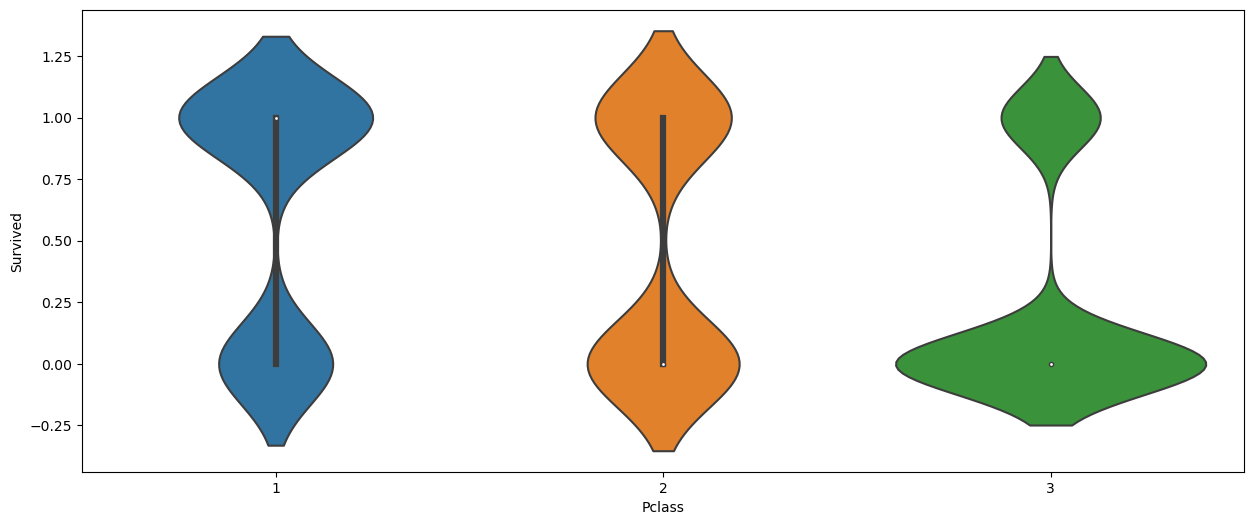

In [15]:
plt.figure(figsize = (15, 6))
#plt.axis([1,3,0,1])

sns.violinplot(data = train_data, x = 'Pclass', y = 'Survived')


In [16]:
# Relation between Sex and survival rate

train_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


We can see that women had a much higher rate of survival. 

<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

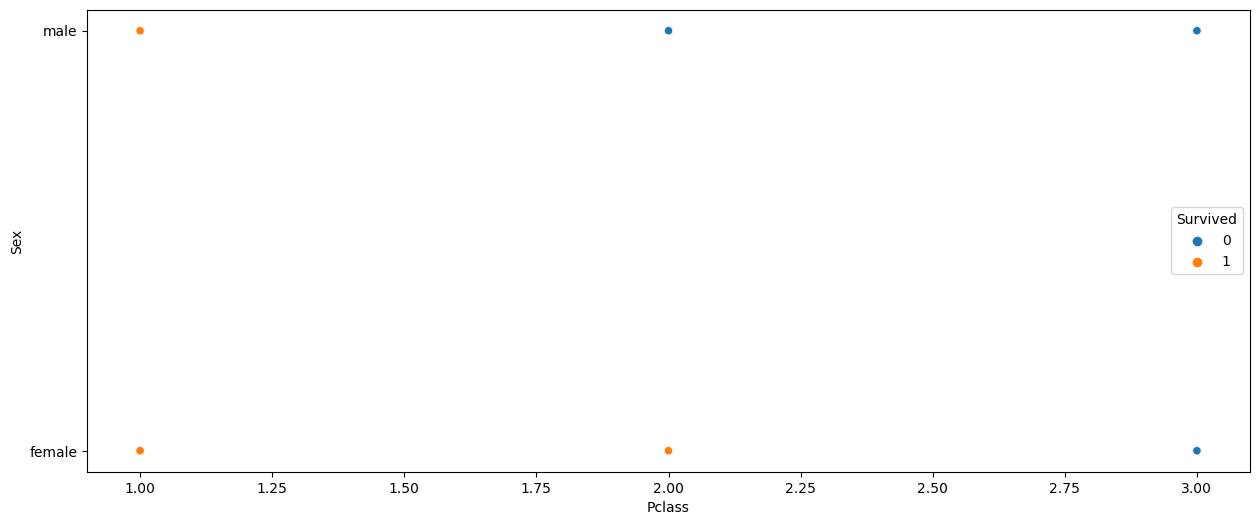

In [17]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = train_data, x = 'Pclass', y = 'Sex', hue = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

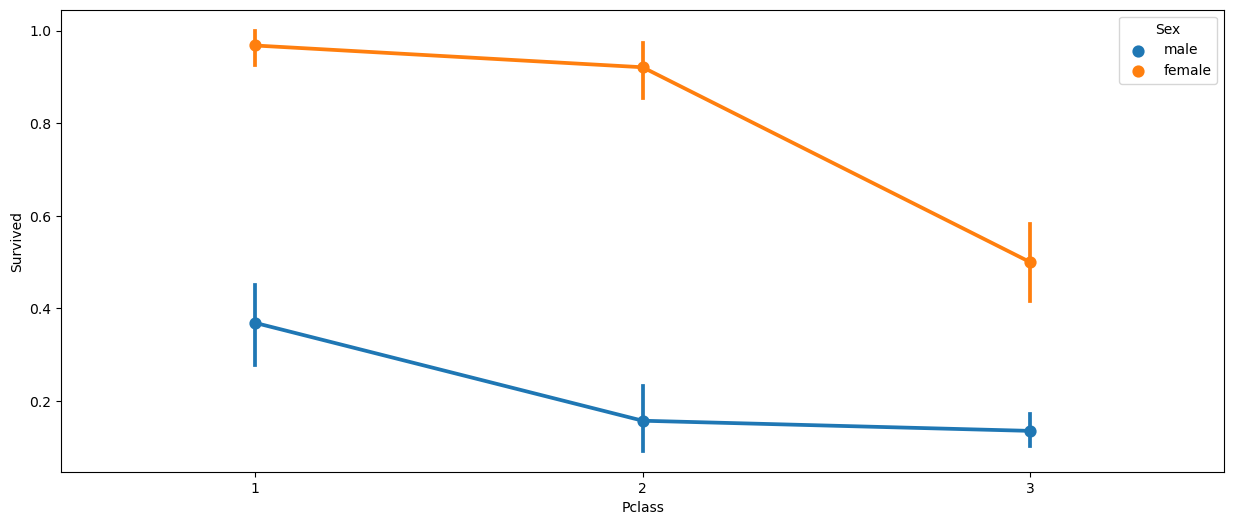

In [18]:
plt.figure(figsize = (15,6))
sns.pointplot(data = train_data, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [19]:
train_data[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

Even though this is a very simple plot but we find out that women from Class 1 and class 2 will have a higher survival rate and men from third class have a very low survival rate. 

In [20]:
print(train_data.groupby(['Sex']).count())
train_data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).count()

        Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Sex                                                                      
female       314     314   314  261    314    314     314   314     97   
male         577     577   577  453    577    577     577   577    107   

        Embarked  
Sex               
female       312  
male         577  


Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347

In [21]:
# Relation between SibSp and Parch
print(train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean())
print('\n\n')
print(train_data[['Parch', 'Survived']].groupby(['Parch']).mean())

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000



       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


* **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* ** Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

## Data Visualisation

Let's look at the relation between Age and Survival

<Figure size 1500x600 with 0 Axes>

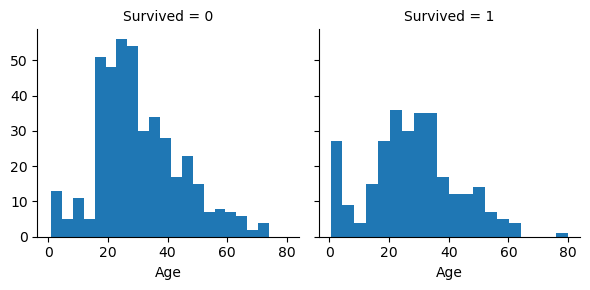

In [22]:
plt.figure(figsize = (15,6))
g = sns.FacetGrid(train_data, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

Let's also look at the port people embarked from 

Let's find the relationship of survival between different Source stations

<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

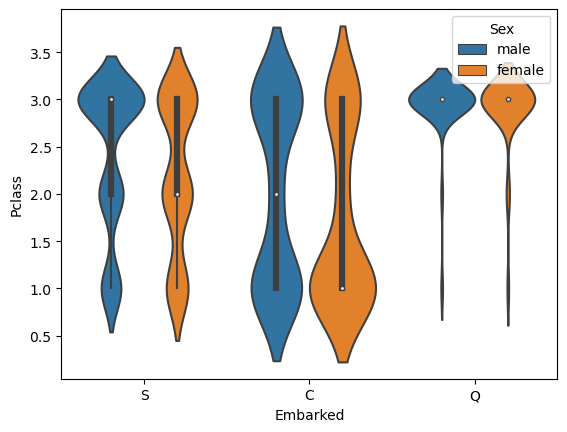

In [23]:
sns.violinplot(x = 'Embarked', y = 'Pclass', data = train_data, hue = 'Sex')

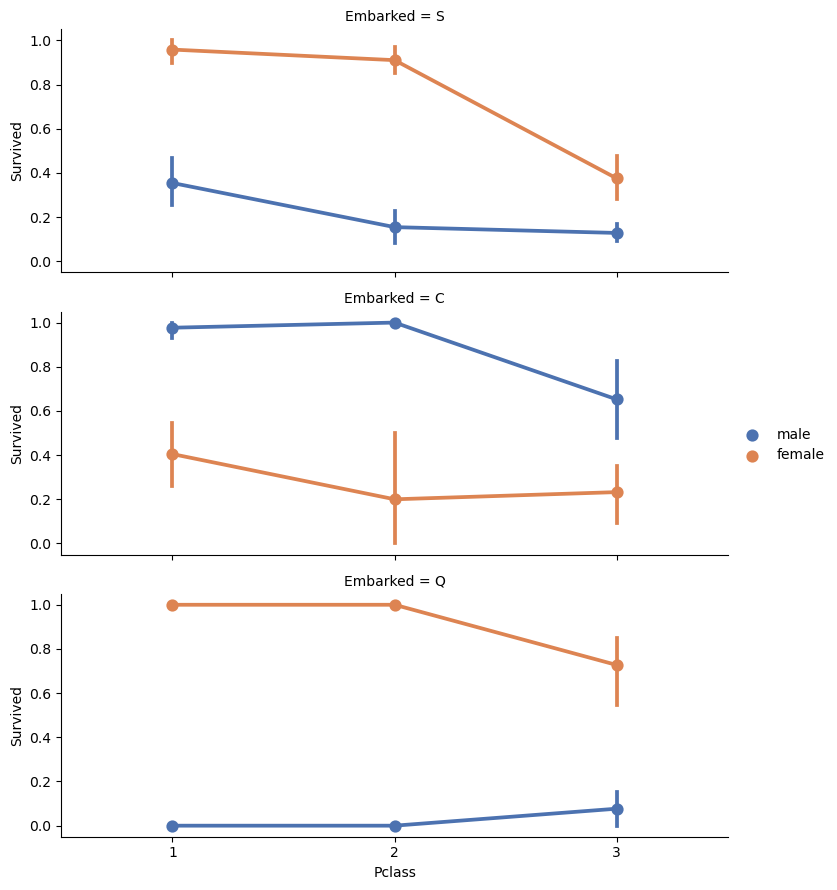

In [24]:
grid = sns.FacetGrid(train_data, row = 'Embarked', size = 3, aspect = 2.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

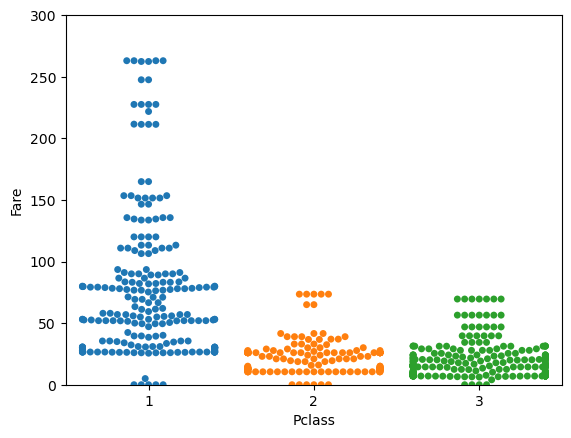

In [25]:
# Relation between fare and different Pclass
plt.axis([1, 3, 0, 300])
sns.swarmplot(x = 'Pclass', y = 'Fare', data = train_data)

**Inference**

* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

**Decisions Taken**

* Add Sex feature to model training.
* Complete and add Embarked feature to model training.

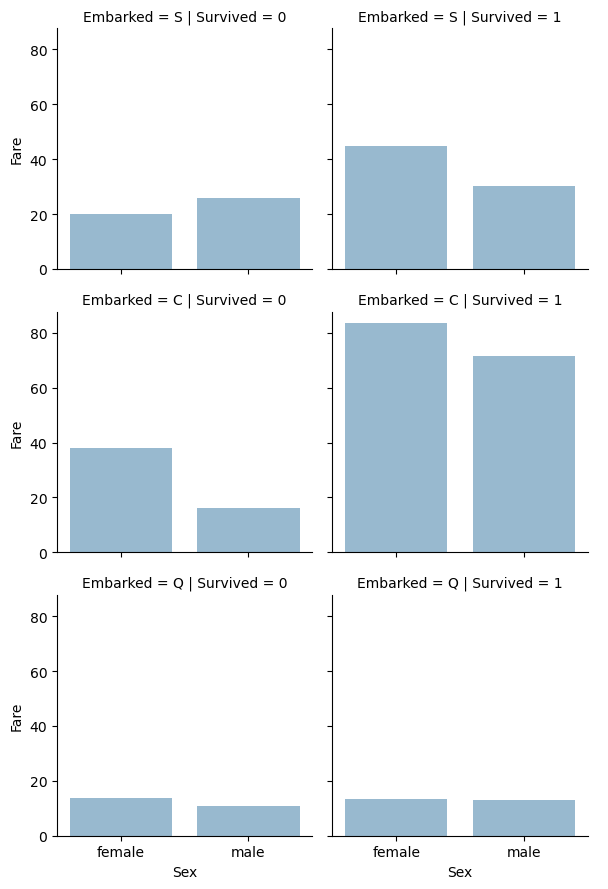

In [26]:
grid = sns.FacetGrid(train_data, row = 'Embarked', col = 'Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)
grid.add_legend()

**Observation** 
* Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decision**
* Consider banding the fare feature  

## Further Data Wrangling

Let's start by dropping unwanted features. 

In [27]:
before_rows = train_data.shape[1]
print(before_rows)
train_data.drop(['Ticket','Cabin'], axis = 1, inplace = True)
test_data.drop(['Ticket', 'Cabin'], inplace = True, axis = 1)
after_rows = train_data.shape[1]
print(after_rows)
combine = [train_data, test_data]

11
9


## Feature engineering 
**Creating new features extracting from existing data** <br> 
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [28]:
for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(train_data['Title'], train_data['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can also look at the survival rates.

In [29]:
train_data[['Title', 'Survived', 'Sex']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False )

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


Let's generate classes for different titles and divide them into different title classes. The most common ones are Mr. , Mrs. , Master, Miss. The fifth category can be Rare. 

In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Male_rare')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Dona'], 'Female_rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Female_rare,1.000000
1,Male_rare,0.285714
2,Master,0.575000
3,Miss,0.702703
4,Mr,0.156673
5,Mrs,0.793651


We can convert the categorical titles to ordinal

In [31]:
title_class = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Female_rare": 5, "Male_rare" : 6}
for dataset in combine: 
    dataset['Title_class'] = dataset['Title'].map(title_class)
    dataset['Title_class'].fillna(0, inplace = True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_class
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1


We do not require names after this either so let's drop that data

In [32]:
test_data.drop('Name', axis = 1, inplace = True)
train_data.drop('Name', axis = 1, inplace = True)

**Convert a categorical variable to numerical**

Convert females = 1 and males = 0


In [33]:
for dataset in combine: 
    dataset['Sex'] = dataset['Sex'].map( {'female' : 1, 'male' : 0} ).astype(int)
train_data.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_class
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S,Mr,1
2,1,1,1,38.0,1,0,71.2833,C,Mrs,3
3,1,3,1,26.0,0,0,7.9250,S,Miss,2
4,1,1,1,35.0,1,0,53.1000,S,Mrs,3
5,0,3,0,35.0,0,0,8.0500,S,Mr,1


In [34]:
train_data.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
Title_class      0
dtype: int64

We need to find data to replace teh empty values of Age and Embarked

## Completing a numerical continous feature

In [35]:
import random as rnd

We need to replace age with a logical guess. We can look at Pclass and age and find the correlation between age and Pclass. For not rare classes, we can also use title classes as a means of finding the estimate age. 

Let's do this for all the other classes as well using iteration

In [36]:
guess_ages = np.zeros((2,3))
guess_age_f = np.zeros((3,4))
guess_age_m = np.zeros((3,4))

In [37]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_class
PassengerId,,,,,,,,,,
1,0,3,0,22,1,0,7.2500,S,Mr,1
2,1,1,1,38,1,0,71.2833,C,Mrs,3
3,1,3,1,26,0,0,7.9250,S,Miss,2
4,1,1,1,35,1,0,53.1000,S,Mrs,3
5,0,3,0,35,0,0,8.0500,S,Mr,1


Binning data into different categories. 

In [38]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [39]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_class,AgeBand
PassengerId,,,,,,,,,,,
1,0,3,0,1,1,0,7.2500,S,Mr,1,"(16.0, 32.0]"
2,1,1,1,2,1,0,71.2833,C,Mrs,3,"(32.0, 48.0]"
3,1,3,1,1,0,0,7.9250,S,Miss,2,"(16.0, 32.0]"
4,1,1,1,2,1,0,53.1000,S,Mrs,3,"(32.0, 48.0]"
5,0,3,0,2,0,0,8.0500,S,Mr,1,"(32.0, 48.0]"


In [40]:
train_data = train_data.drop(['AgeBand'], axis = 1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_class
PassengerId,,,,,,,,,,
1,0,3,0,1,1,0,7.2500,S,Mr,1
2,1,1,1,2,1,0,71.2833,C,Mrs,3
3,1,3,1,1,0,0,7.9250,S,Miss,2
4,1,1,1,2,1,0,53.1000,S,Mrs,3
5,0,3,0,2,0,0,8.0500,S,Mr,1


**Create new feature combining existing features** <br> 

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [41]:
for dataset in combine: 
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(['Survived'], ascending = False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


What about people with no family? We need to create a new feature for people who are alone. 

In [42]:
for dataset in combine: 
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let's drop Parch, SibSp 

In [43]:
train_data.drop(['Parch', 'SibSp'], inplace = True, axis = 1)
test_data.drop(['Parch', 'SibSp'], inplace = True, axis = 1)
combine = [train_data, test_data]

**Completing a categorical feature** <br> 
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [44]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [45]:
for dataset in combine: 
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Let's replace by ordinal values 

In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Title_class,FamilySize,IsAlone
PassengerId,,,,,,,,,,
1,0,3,0,1,7.2500,0,Mr,1,2,0
2,1,1,1,2,71.2833,1,Mrs,3,2,0
3,1,3,1,1,7.9250,0,Miss,2,1,1
4,1,1,1,2,53.1000,0,Mrs,3,2,0
5,0,3,0,2,8.0500,0,Mr,1,1,1


In [47]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Title_class,FamilySize,IsAlone
0,892,3,0,2,7.8292,2,Mr,1,1,1
1,893,3,1,2,7.0000,0,Mrs,3,2,0
2,894,2,0,3,9.6875,2,Mr,1,1,1
3,895,3,0,1,8.6625,0,Mr,1,1,1
4,896,3,1,1,12.2875,0,Mrs,3,3,0


Let's try to create a fare band


In [48]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 5)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean()
                                

,FareBand,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [49]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.8540) & (dataset['Fare'] <= 10.500), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.500) & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]

In [50]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Title_class,FamilySize,IsAlone
PassengerId,,,,,,,,,,
1,0,3,0,1,0,0,Mr,1,2,0
2,1,1,1,2,4,1,Mrs,3,2,0
3,1,3,1,1,1,0,Miss,2,1,1
4,1,1,1,2,4,0,Mrs,3,2,0
5,0,3,0,2,1,0,Mr,1,1,1


## Model, Predict and Solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. 

We can also store the values of each prediction model in a dictionary

In [51]:
pred_values = {}

Let's collect our splits. 

In [52]:
X_train = train_data.drop(['Survived'], axis = 1)
y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis = 1).copy()
print(X_train.shape, y_train.shape, X_test.shape)

(891, 9) (891,) (418, 9)


In [53]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Title_class,FamilySize,IsAlone
PassengerId,,,,,,,,,
1,3,0,1,0,0,Mr,1,2,0
2,1,1,2,4,1,Mrs,3,2,0
3,3,1,1,1,0,Miss,2,1,1
4,1,1,2,4,0,Mrs,3,2,0
5,3,0,2,1,0,Mr,1,1,1


In [54]:
X_train.drop('Title', axis = 1, inplace = True)
X_test.drop('Title', axis = 1, inplace = True)

### Logistic Regression
Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference

In [55]:
# Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.81

Correlations with each feature 

In [56]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_class', 'FamilySize',
       'IsAlone'],
      dtype='object')

In [57]:
coeff_data = pd.DataFrame(train_data.columns.delete(0))
coeff_data.columns = ['Feature']
coeff_data['Correlation'] = pd.Series(logreg.coef_[0])
coeff_data.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.288112
5,Title,0.363280
3,Fare,0.222570
4,Embarked,0.219569
7,FamilySize,-0.444793
6,Title_class,-0.449217
2,Age,-0.658816
0,Pclass,-0.884347
8,IsAlone,NaN


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

* Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
* Inversely as Pclass increases, probability of Survived=1 decreases the most.
* So is Title as second highest positive correlation.

### Support Vector Machines

In [58]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.39

### K - Nearest Neighbours

In [59]:
values = {}
for val in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = val)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    acc = round(knn.score(X_train, y_train) * 100, 2)
    values[val] = acc


Let's plot the values according to the number fo neighbours

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Accuracy Score vs Neighbours'}, xlabel='Number of Neighbours', ylabel='Accuracy Score'>

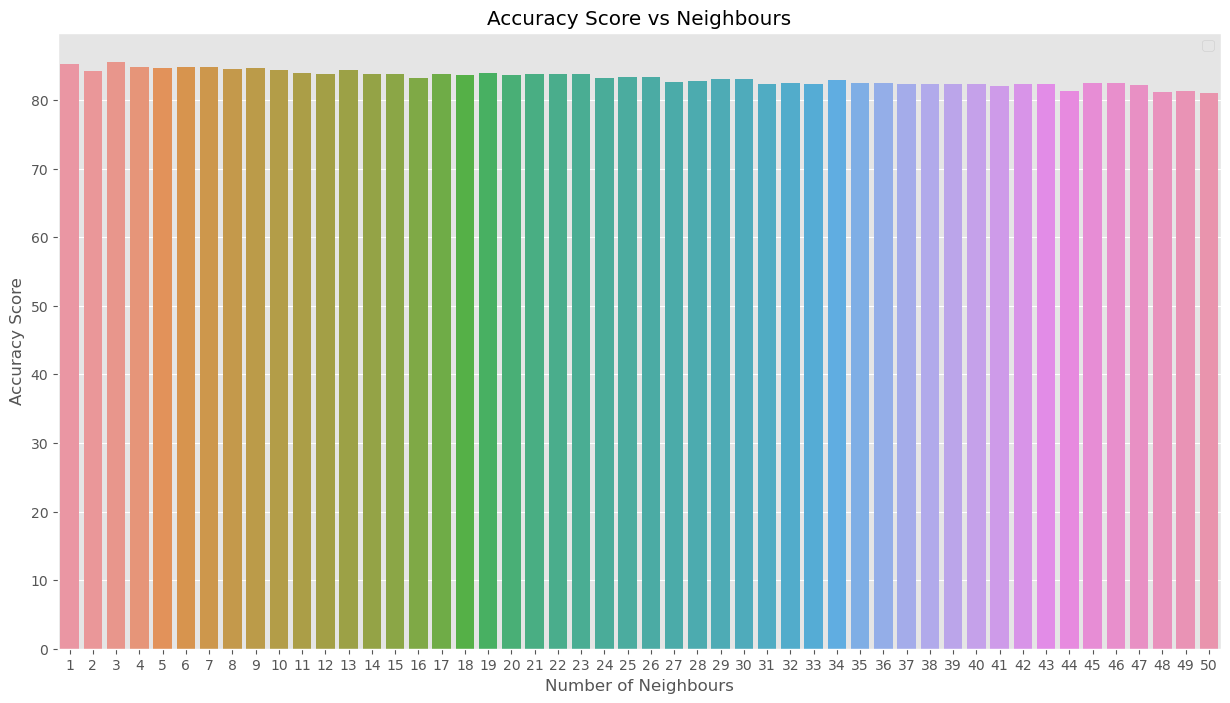

In [60]:
x_values, y_values = [], []
for val in values: 
    x_values.append(val)
    y_values.append(values[val])
from matplotlib import style
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.title('Accuracy Score vs Neighbours')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy Score')
plt.legend()
sns.barplot(x = x_values, y = y_values)

In [61]:
acc_knn = 0
for val in values:
    if values[val] > acc_knn: 
        acc_knn = values[val]
acc_knn

85.52

### Gaussian Naive Bayes

In [62]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.69

### Perception

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [63]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

75.42

In [64]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

81.03

In [65]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

78.0

### Decision Tree Classifiers

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [66]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

86.2

### Random Forests
The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [67]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

87.88

### Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [68]:
pred_values = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
pred_values.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.88
8,Decision Tree,86.20
1,KNN,85.52
0,Support Vector Machines,83.39
7,Linear SVC,81.03
2,Logistic Regression,80.81
4,Naive Bayes,79.69
6,Stochastic Gradient Decent,78.00
5,Perceptron,75.42


The highest value is achieved for Random Forests and Decision Tree

Let's make some manual changes in our predictions basedon the inferences from our data. 

## Deep Learning Approach

In [ ]:
# Machine Learning Tools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Deep Learning Libraries
import tensorflow as tf
import keras 
import theano

# Model Building Tools from Keras Library
from keras.models import Sequential 
from keras.layers import Dense

In [ ]:
X = X_train.values
y = y_train.values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(layer = Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8 ))
classifier.add(layer = Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(layer = Dense(units = 1, kernel_initializer = 'uniform' , activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

In [ ]:
y_pred = classifier.predict(X_val)
sns.distplot(y_pred, kde = False)
y_pred

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

In [ ]:
cm = confusion_matrix(y_val, y_pred)
cm

In [ ]:
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm [0, 1] + cm[1, 1] + cm[1, 0])
accuracy

In [ ]:
test = X_test.values()
y_pred = classifier.predict(test)
y_pred = 

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('data/submission.csv', index=False)

In [ ]:
submission.describe()